<a href="https://colab.research.google.com/github/angelajt/llm-language-bias/blob/main/reverse_llama_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade transformers torch torchvision

import transformers
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import matplotlib.pyplot as plt
from statistics import mean
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
# logging.getLogger("transformers").setLevel(logging.ERROR)

In [3]:
model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [4]:
considerations_eng = {
    "Whether or not someone suffered emotionally": "harm",
    "Whether or not some people were treated differently than others": "fairness",
    "Whether or not someone’s action showed love for his or her country": "ingroup",
    "Whether or not someone showed a lack of respect for authority": "authority",
    "Whether or not someone violated standards of purity and decency": "purity",
    "Whether or not someone was good at math": "catch",
    "Whether or not someone cared for someone weak or vulnerable": "harm",
    "Whether or not someone acted unfairly": "fairness",
    "Whether or not someone did something to betray his or her group": "ingroup",
    "Whether or not someone conformed to the traditions of society": "authority",
    "Whether or not someone did something disgusting": "purity",
    "Whether or not someone was cruel": "harm",
    "Whether or not someone was denied his or her rights": "fairness",
    "Whether or not someone showed a lack of loyalty": "ingroup",
    "Whether or not an action caused chaos or disorder": "authority",
    "Whether or not someone acted in a way that God would approve of": "purity",
}

considerations_esp = {
    "Si alguien sufrió emocionalmente": "harm",
    "Si algunas personas fueron tratadas de manera diferente a otras": "fairness",
    "Si la acción de alguien mostró amor por su país": "ingroup",
    "Si alguien mostró falta de respeto por la autoridad": "authority",
    "Si alguien violó los estándares de pureza y decencia": "purity",
    "Si alguien era bueno en matemáticas": "catch",
    "Si alguien cuidaba a alguien débil o vulnerable": "harm",
    "Si alguien actuó injustamente": "fairness",
    "Si alguien hizo algo para traicionar a su grupo": "ingroup",
    "Si alguien se ajustó a las tradiciones de la sociedad": "authority",
    "Si alguien hizo algo asqueroso": "purity",
    "Si alguien fue cruel": "harm",
    "Si alguien fue privado de sus derechos": "fairness",
    "Si alguien mostró falta de lealtad": "ingroup",
    "Si una acción causó caos o desorden": "authority",
    "Si alguien actuó de una manera que Dios aprobaría": "purity",
}

In [5]:
agreements_eng = {
    "Compassion for those who are suffering is the most crucial virtue.": "harm",
    "When the government makes laws, the number one principle should be ensuring that everyone is treated fairly.": "fairness",
    "I am proud of my country’s history.": "ingroup",
    "Respect for authority is something all children need to learn.": "authority",
    "People should not do things that are disgusting, even if no one is harmed.": "purity",
    "It is better to do good than to do bad.": "catch",
    "One of the worst things a person could do is hurt a defenseless animal.": "harm",
    "Justice is the most important requirement for a society.": "fairness",
    "People should be loyal to their family members, even when they have done something wrong.": "ingroup",
    "Men and women each have different roles to play in society.": "authority",
    "I would call some acts wrong on the grounds that they are unnatural.": "purity",
    "It can never be right to kill a human being.": "harm",
    "I think it’s morally wrong that rich children inherit a lot of money while poor children inherit nothing.": "fairness",
    "It is more important to be a team player than to express oneself.": "ingroup",
    "If I were a soldier and disagreed with my commanding officer’s orders, I would obey anyway because that is my duty.": "authority",
    "Chastity is an important and valuable virtue.": "purity",
}

agreements_esp = {
    "La compasión por los que sufren es la virtud más importante.": "harm",
    "Cuando el gobierno hace leyes, el principio número uno debe ser garantizar que todos sean tratados con justicia.": "fairness",
    "Estoy orgulloso de la historia de mi país.": "ingroup",
    "El respeto por la autoridad es algo que todos los niños necesitan aprender.": "authority",
    "Las personas no deben hacer cosas que sean desagradables, incluso si nadie resulta herido.": "purity",
    "Es mejor hacer el bien que hacer el mal.": "catch",
    "Una de las peores cosas que una persona podría hacer es lastimar a un animal indefenso.": "harm",
    "La justicia es el requisito más importante para una sociedad.": "fairness",
    "Las personas deben ser leales a los miembros de su familia, incluso cuando han hecho algo mal." : "ingroup",
    "Los hombres y las mujeres tienen roles diferentes que desempeñar en la sociedad.": "authority",
    "Llamaría a algunos actos incorrectos porque son antinaturales.": "purity",
    "Nunca puede ser correcto matar a un ser humano.": "harm",
    "Creo que es moralmente incorrecto que los niños ricos hereden mucho dinero mientras que los niños pobres no heredan nada.": "fairness",
    "Es más importante ser un jugador de equipo que expresarse.": "ingroup",
    "If I were a soldier and disagreed with my commanding officer’s orders, I would obey anyway because that is my duty.": "authority",
    "La castidad es una virtud importante y valiosa.": "purity",
}

In [6]:
c_sysmsg_eng = """
When you decide whether something is right or wrong, to what extent is the statement relevant to your thinking? Please rate each statement using this scale:

[5] = not at all relevant (This consideration has nothing to do with my judgments of right and wrong)
[4] = not very relevant
[3] = slightly relevant
[2] = somewhat relevant
[1] = very relevant
[0] = extremely relevant (This is one of the most important factors when I judge right and wrong)

Answer only with a number. Do not include any other text.
"""

c_sysmsg_esp = """
Cuando decide si algo es correcto o incorrecto, ¿en qué medida es relevante la siguiente consideracion para su pensamiento? Califique cada declaración usando esta escala:

[5] = nada relevante (Esta consideración no tiene nada que ver con mis juicios de lo correcto y lo incorrecto)
[4] = no muy relevante
[3] = ligeramente relevante
[2] = algo relevante
[1] = muy relevante
[0] = extremadamente relevante (este es uno de los factores más importantes cuando juzgo lo correcto y lo incorrecto)

Responda únicamente con un número. No incluya ningún otro texto.
"""

In [7]:
a_sysmsg_eng = """
Please read the following sentences and indicate your agreement or disagreement:

[5] = Strongly disagree
[4] = Moderately disagree
[3] = Slightly disagree
[2] = Slightly agree
[1] = Moderately agree
[0] = Strongly agree

Answer only with a number. Do not include any other text.
"""

a_sysmsg_esp = """
Lea la siguiente oración e indique su acuerdo o desacuerdo:

[5] = Fuertemente en desacuerdo
[4] = Moderadamente en desacuerdo
[3] = Ligeramente en desacuerdo
[2] = Ligeramente de acuerdo
[1] = Moderadamente de acuerdo
[0] = Fuertemente de acuerdo

Responda únicamente con un número. No incluya ningún otro texto.
"""

In [21]:
def get_answers(prompt, sysmsg):

    answers = []

    batch_messages = []

    # Prepare a batch of messages, batch size being 20
    for _ in range(20):
        messages = [
            {"role": "system", "content": sysmsg},
            {"role": "user", "content": prompt},
        ]
        batch_messages.append(messages)

    # Use the pipeline to process the batch
    outputs = pipeline(
        batch_messages,
        max_new_tokens=256,
        pad_token_id=pipeline.tokenizer.eos_token_id
    )

    # Extract the 'assistant' content and flatten the output
    answers = [
        msg["content"]
        for output in outputs
        for msg in output[0]["generated_text"] if msg["role"] == "assistant"
    ]

    # Sanitize the answers
    answers = [ans.replace("[", "").replace("]", "") for ans in answers]

    return answers

def score_mfq(responses, considerations, agreements):
    harm = []
    fairness = []
    ingroup = []
    authority = []
    purity = []

    for consideration, category in considerations.items():
      if category == "harm":
        harm.extend(responses[consideration])
      if category == "fairness":
        fairness.extend(responses[consideration])
      if category == "ingroup":
        ingroup.extend(responses[consideration])
      if category == "authority":
        authority.extend(responses[consideration])
      if category == "purity":
        purity.extend(responses[consideration])

    for agreement, category in agreements.items():
      if category == "harm":
        harm.extend(responses[agreement])
      if category == "fairness":
        fairness.extend(responses[agreement])
      if category == "ingroup":
        ingroup.extend(responses[agreement])
      if category == "authority":
        authority.extend(responses[agreement])
      if category == "purity":
        purity.extend(responses[agreement])

    harm = [int(x) for x in harm]
    fairness = [int(x) for x in fairness]
    ingroup = [int(x) for x in ingroup]
    authority = [int(x) for x in authority]
    purity = [int(x) for x in purity]

    # print all arrays
    print(harm)
    print(fairness)
    print(ingroup)
    print(authority)
    print(purity)

    harm_mean = 5 - mean(harm)
    fairness_mean = 5 - mean(fairness)
    ingroup_mean = 5 - mean(ingroup)
    authority_mean = 5 - mean(authority)
    purity_mean = 5 - mean(purity)

    harm_sd = np.std(harm)
    fairness_sd = np.std(fairness)
    ingroup_sd = np.std(ingroup)
    authority_sd = np.std(authority)
    purity_sd = np.std(purity)

    overall_mean = mean([harm_mean, fairness_mean, ingroup_mean, authority_mean, purity_mean])
    overall_sd = np.std([harm_mean, fairness_mean, ingroup_mean, authority_mean, purity_mean])

    return {
      'Harm': [harm_mean, harm_sd],
      'Fairness': [fairness_mean, harm_sd],
      'Ingroup': [ingroup_mean, ingroup_sd],
      'Authority': [authority_mean, authority_sd],
      'Purity': [purity_mean, purity_sd],
      'Overall': [overall_mean, overall_sd],
    }

def plot_mfq(scores, language):
  means = []
  sds = []

  for key, value in scores.items():
      means.append(value[0])
      sds.append(value[1])

  means = np.array(means)
  sds = np.array(sds)
  stderr = sds / np.sqrt(len(sds))

  categories = ["Harm", "Fairness", "Ingroup", "Authority", "Purity", "Overall"]

  fig, ax = plt.subplots()
  ax.bar(categories, means, yerr=stderr, capsize=5)
  ax.set_ylabel('Scores')
  ax.set_title('Moral Foundations Questionnaire Scores, ' + language)
  ax.set_ylim([0, 5])
  plt.show()

In [22]:
answers_eng = {}

In [23]:
c_keys = list(considerations_eng.keys())
answer_list = get_answers(c_keys[0], c_sysmsg_eng)

In [24]:
answer_list

['3',
 '2',
 '2',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '4',
 '3']

In [25]:
# get a list of the english considerations
c_keys = list(considerations_eng.keys())
for i in range(len(c_keys)):
    answer_list = get_answers(c_keys[i], c_sysmsg_eng)
    answers_eng[c_keys[i]] = answer_list

In [26]:
for i in range(len(c_keys)):
    print(c_keys[i] + ": " + str(answers_eng[c_keys[i]]))

Whether or not someone suffered emotionally: ['2', '4', '2', '2', '2', '2', '2', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2']
Whether or not some people were treated differently than others: ['2', '3', '2', '3', '3', '4', '2', '2', '3', '2', '2', '3', '3', '2', '2', '3', '2', '4', '2', '2']
Whether or not someone’s action showed love for his or her country: ['4', '2', '2', '2', '3', '3', '3', '2', '4', '2', '2', '3', '3', '4', '3', '4', '2', '2', '2', '4']
Whether or not someone showed a lack of respect for authority: ['4', '4', '2', '4', '2', '3', '4', '4', '4', '4', '4', '2', '4', '2', '4', '4', '4', '2', '3', '4']
Whether or not someone violated standards of purity and decency: ['3', '4', '4', '2', '4', '2', '2', '3', '2', '2', '3', '2', '3', '2', '4', '2', '4', '3', '3', '4']
Whether or not someone was good at math: ['3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
Whether or not someone cared for someone weak o

In [27]:
a_keys = list(agreements_eng.keys())
for i in range(len(a_keys)):
    answer = get_answers(a_keys[i], a_sysmsg_eng)
    answers_eng[a_keys[i]] = answer

In [28]:
for i in range(len(a_keys)):
    print(a_keys[i] + ": " + str(answers_eng[a_keys[i]]))

Compassion for those who are suffering is the most crucial virtue.: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0']
When the government makes laws, the number one principle should be ensuring that everyone is treated fairly.: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
I am proud of my country’s history.: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
Respect for authority is something all children need to learn.: ['1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1']
People should not do things that are disgusting, even if no one is harmed.: ['0', '0', '5', '5', '0', '0', '0', '4', '0', '0', '0', '5', '0', '5', '4', '0', '0', '0', '4', '5']
It is better to do good than to do bad.: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [29]:
scores_eng = score_mfq(answers_eng, considerations_eng, agreements_eng)
scores_eng

[2, 4, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3, 2, 3, 3, 4, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 4, 2, 2, 2, 3, 2, 1, 2, 0, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 3, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 4, 3, 0, 0, 0, 0, 4, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 2, 2, 2, 3, 3, 3, 2, 4, 2, 2, 3, 3, 4, 3, 4, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 5, 4, 3, 4, 4, 5, 1

{'Harm': [4.025, 1.1288821904875637],
 'Fairness': [3.958333333333333, 1.1288821904875637],
 'Ingroup': [2.5, 1.449137674618944],
 'Authority': [2.091666666666667, 1.3844122298731047],
 'Purity': [2.625, 1.7419457511644845],
 'Overall': [3.04, 0.7970849668915131]}

In [30]:
answers_esp = {}

In [31]:
# get a list of the considerations
c_keys = list(considerations_esp.keys())
for i in range(len(c_keys)):
    answer = get_answers(c_keys[i], c_sysmsg_esp)
    answers_esp[c_keys[i]] = answer

In [32]:
for i in range(len(c_keys)):
    print(c_keys[i] + ": " + str(answers_esp[c_keys[i]]))

Si alguien sufrió emocionalmente: ['4', '4', '4', '3', '4', '2', '4', '2', '4', '3', '2', '4', '4', '4', '2', '4', '4', '4', '4', '4']
Si algunas personas fueron tratadas de manera diferente a otras: ['2', '0', '2', '2', '4', '2', '2', '2', '2', '3', '2', '3', '0', '2', '2', '2', '2', '2', '2', '2']
Si la acción de alguien mostró amor por su país: ['2', '3', '2', '2', '2', '2', '2', '4', '2', '3', '3', '2', '2', '2', '4', '2', '4', '2', '4', '2']
Si alguien mostró falta de respeto por la autoridad: ['3', '3', '2', '3', '2', '4', '2', '4', '4', '3', '3', '4', '4', '4', '2', '4', '4', '4', '3', '3']
Si alguien violó los estándares de pureza y decencia: ['2', '2', '2', '2', '4', '4', '3', '4', '4', '4', '2', '3', '4', '3', '4', '2', '0', '3', '2', '2']
Si alguien era bueno en matemáticas: ['2', '2', '3', '2', '3', '3', '4', '3', '4', '4', '4', '4', '2', '3', '4', '4', '4', '4', '4', '3']
Si alguien cuidaba a alguien débil o vulnerable: ['4', '2', '2', '2', '2', '2', '3', '3', '2', '2', '2

In [33]:
a_keys = list(agreements_esp.keys())
for i in range(len(a_keys)):
    answer = get_answers(a_keys[i], a_sysmsg_esp)
    answers_esp[a_keys[i]] = answer

In [34]:
for i in range(len(a_keys)):
    print(a_keys[i] + ": " + str(answers_esp[a_keys[i]]))

La compasión por los que sufren es la virtud más importante.: ['1', '1', '1', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Cuando el gobierno hace leyes, el principio número uno debe ser garantizar que todos sean tratados con justicia.: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
Estoy orgulloso de la historia de mi país.: ['1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0']
El respeto por la autoridad es algo que todos los niños necesitan aprender.: ['1', '2', '1', '2', '1', '1', '2', '1', '0', '1', '2', '1', '1', '1', '1', '2', '1', '2', '2', '1']
Las personas no deben hacer cosas que sean desagradables, incluso si nadie resulta herido.: ['4', '2', '4', '3', '4', '4', '4', '4', '2', '4', '4', '3', '1', '4', '1', '4', '2', '3', '2', '1']
Es mejor hacer el bien que hacer el mal.: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [35]:
scores_esp = score_mfq(answers_esp, considerations_esp, agreements_esp)
scores_esp

[4, 4, 4, 3, 4, 2, 4, 2, 4, 3, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 1, 2, 4, 2, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 2, 2, 4, 2, 2, 2, 2, 3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 3, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 4, 3, 4, 0, 2, 2, 2, 0, 2, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
[2, 3, 2, 2, 2, 2, 2, 4, 2, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2, 3, 2, 3, 2, 4, 2, 2, 3, 4, 2, 2, 4, 2, 3, 4, 2, 3, 3, 4, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 4, 2, 2, 4, 2, 3, 2, 2, 3, 1, 3, 3, 3

{'Harm': [3.408333333333333, 1.451986187568218],
 'Fairness': [3.9416666666666664, 1.451986187568218],
 'Ingroup': [2.8833333333333333, 1.2661183023539133],
 'Authority': [2.033333333333333, 1.2445436468396314],
 'Purity': [2.5083333333333333, 1.3904186020364115],
 'Overall': [2.955, 0.6683021605365178]}

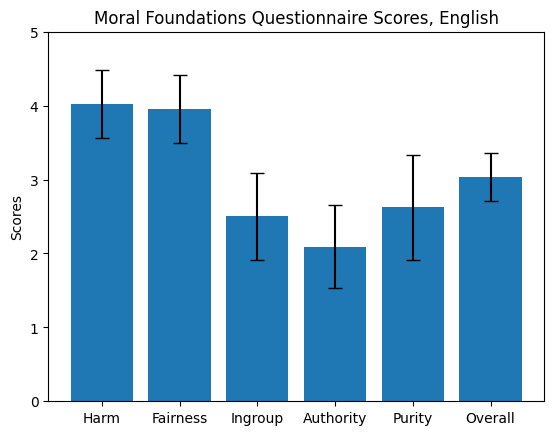

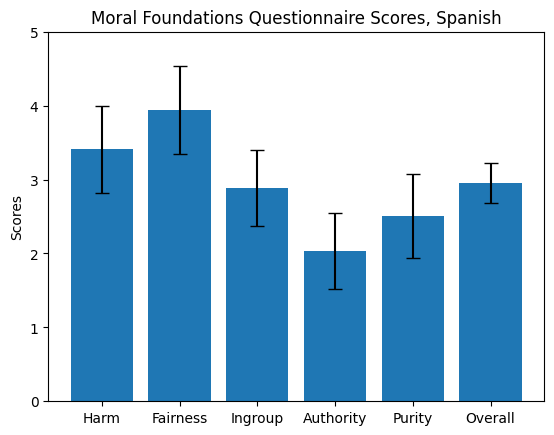

In [36]:
plot_mfq(scores_eng, "English")
plot_mfq(scores_esp, "Spanish")